<a href="https://colab.research.google.com/github/Guy122/Ns3Data/blob/main/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## mysql-server


Install mysql-server

In [ ]:
!apt install mysql-server

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libclone-perl libencode-locale-perl libfcgi-bin libfcgi-perl
  libfcgi0ldbl libhtml-parser-perl libhtml-tagset-perl libhtml-template-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl liblwp-mediatypes-perl libmecab2 libprotobuf-lite23
  liburi-perl mecab-ipadic mecab-ipadic-utf8 mecab-utils mysql-client-8.0 mysql-client-core-8.0
  mysql-server-8.0 mysql-server-core-8.0
Suggested packages:
  libdata-dump-perl libipc-sharedcache-perl libbusiness-isbn-perl libwww-perl mailx tinyca
The following NEW packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libclone-perl libencode-locale-perl libfcgi-bin libfcgi-perl
  libfcgi0ldbl libhtml-parser-perl libhtml-tagset-perl libhtml-template-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl liblwp-mediatypes-perl libmecab2 libprotobuf-l

Install python package

In [ ]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 77.5 MB/s eta 0:00:00


Start mysql service

In [ ]:
!service mysql restart

 * Stopping MySQL database server mysqld
   ...done.
 * Starting MySQL database server mysqld
su: warning: cannot change directory to /nonexistent: No such file or directory
   ...done.


Get into mysql an put the line:

ALTER USER 'root'@'localhost' IDENTIFIED WITH mysql_native_password BY 'root';

for adding root user.

In [ ]:
!mysql

Welcome to the MySQL monitor.  Commands end with ; or \g.
Your MySQL connection id is 10
Server version: 8.0.39-0ubuntu0.22.04.1 (Ubuntu)

Copyright (c) 2000, 2024, Oracle and/or its affiliates.

Oracle is a registered trademark of Oracle Corporation and/or its
affiliates. Other names may be trademarks of their respective
owners.

Type 'help;' or '\h' for help. Type '\c' to clear the current input statement.

mysql> ALTER USER 'root'@'localhost' IDENTIFIED WITH mysql_native_password BY 'root';
Query OK, 0 rows affected (0.01 sec)

mysql> קסןא
    -> 
    -> 
    -> ;
ERROR 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'קסןא' at line 1
mysql> exit
Bye


Go to sql data dir.

In [ ]:
%cd drive/MyDrive/datans3/

/content/drive/MyDrive/datans3


Adding all sql databases to mysql server. it's will take some time ...

In [ ]:
!mysql -u root -proot < DataNs3_correct1.sql

mysql: [Warning] Using a password on the command line interface can be insecure.


Connect to mysql server via python

In [ ]:
# import the connect method
from mysql.connector import connect

# define a connection object
conn = connect(
      user = 'root',
      password = 'root',
      host = 'localhost')

print('A connection object has been created.')

# close the database connection
# conn.close()


A connection object has been created.


Take all databases names and save them into databases_name list.

In [ ]:
mycursor = conn.cursor()

mycursor.execute("SHOW DATABASES;")

myresult = mycursor.fetchall()
databases_name = []
for x in myresult:
  # print(x[0])
  databases_name += [x[0]]

Shows how many databases we have.

In [ ]:
len(databases_name)

44

In [ ]:
# databases_per_numgnb = [[],]*4
databases_per_numgnb3 = []
databases_per_numgnb5 = []
databases_per_numgnb10 = []
databases_per_numgnb20 = []

for i in range(len(databases_name)):
  gnb_index = ''
  for k in range(len(databases_name[i])):
    if databases_name[i][k] =='G':
      # print(correct_databases[i])
      # print(databases_per_numgnb)
      # print(gnb_index)
      if gnb_index == '3':
        databases_per_numgnb3 += [databases_name[i],]
      if gnb_index == '5':
        databases_per_numgnb5 += [databases_name[i],]
      if gnb_index == '10':
        databases_per_numgnb10 += [databases_name[i],]
      if gnb_index == '20':
        databases_per_numgnb20 += [databases_name[i],]
      break
    gnb_index += databases_name[i][k]

databases_per_gnb = [databases_per_numgnb3,databases_per_numgnb5,databases_per_numgnb10,databases_per_numgnb20]
databases_per_numgnb =[len(databases_per_numgnb3),len(databases_per_numgnb5),len(databases_per_numgnb10),len(databases_per_numgnb20)]


Number of databases per gnb's where the index indicate 3,5,10,20 gnb's

In [ ]:
databases_per_numgnb

[11, 16, 11, 2]

In [ ]:
# import the connect method
from mysql.connector import connect

# define a connection object
conn = connect(
      user = 'root',
      password = 'root',
      host = 'localhost')

print('A connection object has been created.')


A connection object has been created.


In [ ]:
databases_per_gnb[0][0]

'3Gnbs_11Ues_simulation2024x09x29xx02x40x34x086453'

In [ ]:
databases_per_gnb[0][2]

'3Gnbs_11Ues_simulation2024x10x02xx03x55x39x118196'

## Prepare data for lstm

Convert database to dataframe for uplink RB's allocation of ue number 1.

In [ ]:
#import pandas
import pandas as pd
# for k in range(3):
conn = connect(
      user = 'root',
      password = 'root',
      host = 'localhost')

mycursor1 = conn.cursor()
mycursor1.execute(f"use {databases_per_gnb[0][2]};")
# mycursor1.execute("SELECT * FROM RBs_Allocation_Ul;")
myresult1 = mycursor1.fetchall()

try:
  query = f"Select * from RBs_Allocation_Ul where UE_ID = 1 and Symlen > 11;"
  # if k == 0:
  result_dataFrame = pd.read_sql(query,conn)
  # else:



    # result_dataFrame2.append(pd.read_sql(query,conn))
    # result_dataFrame2 = pd.concat([result_dataFrame2, pd.read_sql(query,conn)], ignore_index=True)
  conn.close() #close the connection

except Exception as e:
  conn.close()
  print(str(e))

<ipython-input-17-0218cf7e9514>:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_dataFrame = pd.read_sql(query,conn)


Now let's look on our relavent information to the model that we aer going to build.

In [ ]:
result_dataFrame = result_dataFrame[['Rblen', 'Rbst','Frame_Subframe_Slot']]

The TDD pattern is DL|S|UL|UL|DL|DL|S|UL|UL|DL| which mean that the RB's allocation subframe index's are 2,3,7,8.
So now lets add 0's where there was no allocation.

In [ ]:
subframes = ['2','3','7','8']
for f in range(1000):
  for s in subframes:
    if (result_dataFrame['Frame_Subframe_Slot'] == f'[{f},{s},0]').any() == False:
      result_dataFrame.loc[len(result_dataFrame)] = [0, 0, f'[{f},{s},0]']

for k in range(len(result_dataFrame)):
  # result_dataFrame['Frame_Subframe_Slot_index'][k] = int(result_dataFrame['Frame_Subframe_Slot'][k].replace(',', '').replace('[', '').replace(']', ''))
  result_dataFrame.loc[k, 'Frame_Subframe_Slot_index'] = int(result_dataFrame.loc[k, 'Frame_Subframe_Slot'].replace(',', '').replace('[', '').replace(']', ''))

result_dataFrame = result_dataFrame.sort_values(by='Frame_Subframe_Slot_index').reset_index(drop=True)

In [ ]:
result_dataFrame = result_dataFrame[['Rblen']]

In [ ]:
result_dataFrame

,Rblen
0,0
1,0
2,0
3,0
4,0
...,...
3995,0
3996,0
3997,0
3998,1


from matplotlib import pyplot as plt
result_dataFrame['Rblen'].plot(kind='hist', bins=20, title='Rblen')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_dataFrame['Rblen'].plot(kind='line', figsize=(8, 4), title='Rblen')
plt.gca().spines[['top', 'right']].set_visible(False)

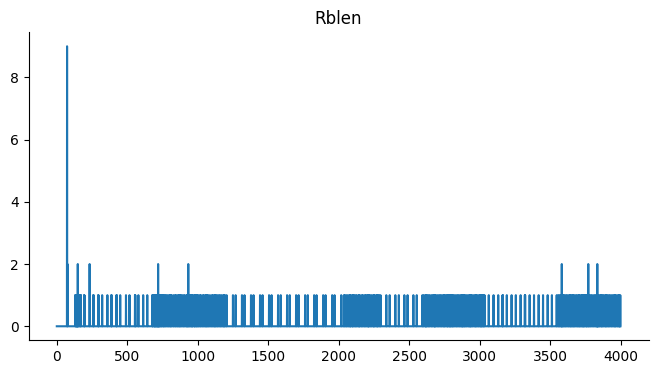

In [ ]:
from matplotlib import pyplot as plt
result_dataFrame['Rblen'].plot(kind='line', figsize=(8, 4), title='Rblen')
plt.gca().spines[['top', 'right']].set_visible(False)

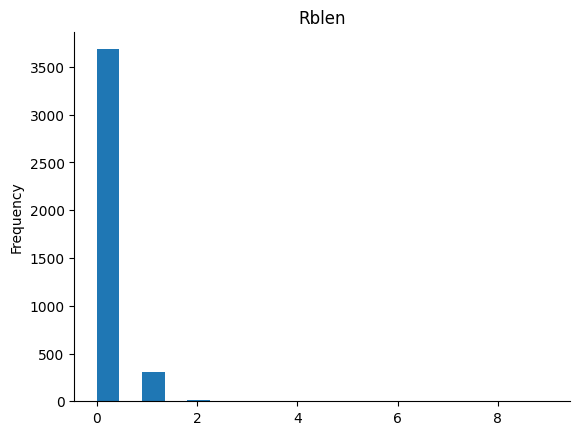

In [ ]:
from matplotlib import pyplot as plt
result_dataFrame['Rblen'].plot(kind='hist', bins=20, title='Rblen')
plt.gca().spines[['top', 'right',]].set_visible(False)

As we see the we get most of the 0's values, it's mean that most of the time there is no transmition.

In [ ]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    # df.set_index('Frame_Subframe_Slot', inplace=True)

    for i in range(1, n_steps+1):
        df[f'Rblen(t-{i})'] = df['Rblen'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 10
shifted_df = prepare_dataframe_for_lstm(result_dataFrame, lookback)
shifted_df[70:120]

,Rblen,Rblen(t-1),Rblen(t-2),Rblen(t-3),Rblen(t-4),Rblen(t-5),Rblen(t-6),Rblen(t-7),Rblen(t-8),Rblen(t-9),Rblen(t-10)
80,0,0.0,0.0,0.0,2.0,2.0,0.0,9.0,0.0,0.0,0.0
81,0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,9.0,0.0,0.0
82,0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,9.0,0.0
83,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,9.0
84,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
85,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
86,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
87,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np
shifted_df_as_np.shape

(3990, 11)

In [ ]:
y = shifted_df_as_np[:, 0]
y.shape

(3990,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np[:, 1:])

shifted_df_as_np

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.11111111,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.11111111, 0.        ,
        0.11111111],
       [0.        , 0.        , 0.        , ..., 0.        , 0.11111111,
        0.        ]])

In [ ]:
X = shifted_df_as_np
X.shape

(3990, 9)

In [ ]:
X = dc(np.flip(X, axis=1))
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.11111111, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.        , 0.11111111, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.11111111, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
split_index = int(len(X) * 0.95)

split_index

3790

In [ ]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3790, 9), (200, 9), (3790,), (200,))

In [ ]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

# y_train = y_train.reshape((-1, 1))
# y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3411, 10, 1), (180, 10, 1), (3790,), (200,))

In [ ]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).long()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).long()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([3411, 10, 1]),
 torch.Size([180, 10, 1]),
 torch.Size([3790]),
 torch.Size([200]))

In [ ]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [ ]:
train_dataset

In [ ]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 10, 1]) torch.Size([16])


## LSTM

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers, bidirectional=True):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, dropout=0.5,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 26)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        # print(f'out {out}')
        # print(f'out[:, -1, :] {out[:, -1, :]}')
        out = self.fc(out[:, -1, :])

        return out


model = LSTM(1, 300, 1)
nn.init.xavier_uniform_(model.lstm.weight_hh_l0)
nn.init.xavier_uniform_(model.lstm.weight_ih_l0)
# torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 300, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=300, out_features=26, bias=True)
)

In [ ]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        # print(f'y_batch {y_batch}')
        # print(f'batch_index {batch_index}')
        # y_batch = y_batch.view(16)

        output = model(x_batch)

        # print(f'output.shape {output.shape}')
        # print(f'y_batch.shape {y_batch.shape}')

        # print(f'y_batch {y_batch}')

        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [ ]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

I also give to the class weights, beacuse if i will not do so the model all the time will converge to 0's values.

In [ ]:
learning_rate = 0.0001
num_epochs = 100
class_weights = torch.tensor([0.001, 0.03, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0])  # Adjust weights based on class imbalance

loss_function = nn.CrossEntropyLoss(weight=class_weights)
# loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 2.387
Batch 200, Loss: 0.984

Val Loss: 1.187
***************************************************

Epoch: 2
Batch 100, Loss: 0.900
Batch 200, Loss: 0.863

Val Loss: 1.008
***************************************************

Epoch: 3
Batch 100, Loss: 0.854
Batch 200, Loss: 0.829

Val Loss: 0.958
***************************************************

Epoch: 4
Batch 100, Loss: 0.822
Batch 200, Loss: 0.883

Val Loss: 0.972
***************************************************

Epoch: 5
Batch 100, Loss: 0.846
Batch 200, Loss: 0.827

Val Loss: 0.975
***************************************************

Epoch: 6
Batch 100, Loss: 0.878
Batch 200, Loss: 0.794

Val Loss: 0.941
***************************************************

Epoch: 7
Batch 100, Loss: 0.760
Batch 200, Loss: 0.906

Val Loss: 0.888
***************************************************

Epoch: 8
Batch 100, Loss: 0.790
Batch 200, Loss: 0.883

Val Loss: 0.951
***************************************************



## Preformance graphs

In [ ]:
X_train.to(device)[0:1]

tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]])

In [ ]:
X_train.shape

torch.Size([3411, 10, 1])

In [ ]:
with torch.no_grad():
  predicted = model(X_train.to(device)).to('cpu').numpy()
predicted

array([[ 3.9311156e+00,  3.9214149e+00,  1.1752807e-02, ...,
        -2.4294754e+01, -2.3945198e+01, -2.4160976e+01],
       [ 3.9311156e+00,  3.9214149e+00,  1.1752807e-02, ...,
        -2.4294754e+01, -2.3945198e+01, -2.4160976e+01],
       [ 3.9311156e+00,  3.9214149e+00,  1.1752807e-02, ...,
        -2.4294754e+01, -2.3945198e+01, -2.4160976e+01],
       ...,
       [ 3.8467805e+00,  3.8480091e+00,  2.9284785e-02, ...,
        -2.3838806e+01, -2.3498833e+01, -2.3708546e+01],
       [ 3.6581764e+00,  3.6818213e+00,  6.9472067e-02, ...,
        -2.2826273e+01, -2.2507238e+01, -2.2703430e+01],
       [ 3.9311166e+00,  3.9214153e+00,  1.1752859e-02, ...,
        -2.4294756e+01, -2.3945194e+01, -2.4160980e+01]], dtype=float32)

In [ ]:
import torch.nn.functional as F  # For softmax

# Make predictions (no need for gradient tracking in evaluation mode)
with torch.no_grad():
    logits = model(X_train.to(device))  # Forward pass to get raw logits
    probabilities = F.softmax(logits, dim=1)  # Apply softmax to get probabilities
    predicted_classes = torch.argmax(probabilities, dim=1)  # Get the index of the max probability (class)


In [ ]:
predicted_classes

tensor([0, 0, 0,  ..., 1, 1, 0])

In [ ]:
zeros = 0
for i in range(len(predicted_classes)):
  if predicted_classes[i] != 0 and predicted_classes[i] != 1:
    print(i)
    print(predicted_classes[i])
  if predicted_classes[i] == 0:
    zeros += 1

59
tensor(2)
60
tensor(9)
62
tensor(9)
63
tensor(2)
64
tensor(9)
65
tensor(2)
66
tensor(2)
134
tensor(2)


In [ ]:
len(predicted_classes)

3411

In [ ]:
zeros

2235

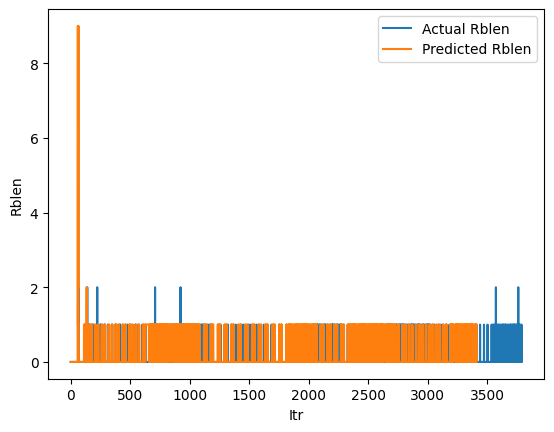

In [ ]:
# with torch.no_grad():
#     predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Rblen')
plt.plot(predicted_classes, label='Predicted Rblen')
plt.xlabel('Itr')
plt.ylabel('Rblen')
plt.legend()
plt.show()

In [ ]:
import torch.nn.functional as F  # For softmax

# Make predictions (no need for gradient tracking in evaluation mode)
with torch.no_grad():
    logits = model(X_test.to(device))  # Forward pass to get raw logits
    probabilities = F.softmax(logits, dim=1)  # Apply softmax to get probabilities
    test_predictions = torch.argmax(probabilities, dim=1)  # Get the index of the max probability (class)

In [ ]:
test_predictions.shape[0]

180

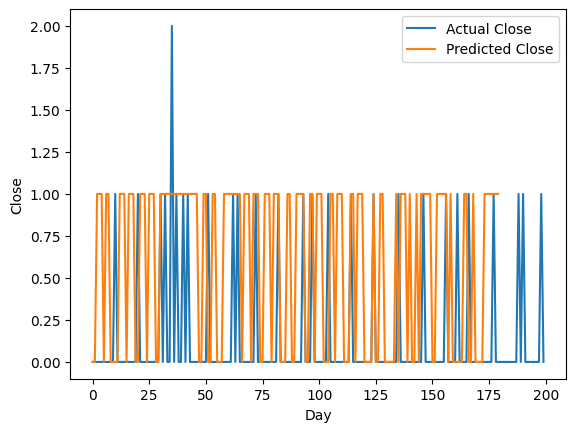

In [ ]:
plt.plot(y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()
